In [3]:
import numpy as np
import pandas as pd
import math

# Deskripsi korban kecelakaan kapal Titanic
file ini akan menjelas tentang berapa banyak orang yang selamat secara lebih detil

In [4]:
titanic=pd.read_csv('titanic.csv')
s=titanic[titanic['Survived']==1]
ts=titanic[titanic['Survived']==0]
p=0
w=0

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Victim that survive by gender

In [8]:
sm=len(s[s['Sex']=='male'])
sf=len(s[s['Sex']=='female'])
tsm=len(ts[ts['Sex']=='male'])
tsf=len(ts[ts['Sex']=='female'])
gender=pd.DataFrame([[sm,sf,(sm+sf)/len(titanic)*100],[tsm,tsf,(tsm+tsf)/len(titanic)*100],[sm+tsm,sf+tsf,(sm+tsm+sf+tsf)/len(titanic)*100]], index='survived unsurvived total'.split(),columns="male female percentage".split())
gender

,male,female,percentage
survived,109,233,38.383838
unsurvived,468,81,61.616162
total,577,314,100.000000


## Victim that survive by Socia-Economic Status


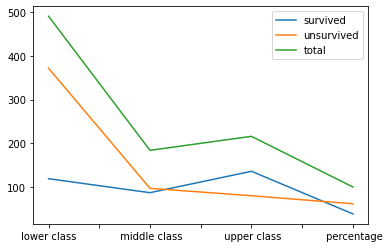

In [17]:
s1=len(s[s['Pclass']==3])
s2=len(s[s['Pclass']==2])
s3=len(s[s['Pclass']==1])
ts1=len(ts[ts['Pclass']==3])
ts2=len(ts[ts['Pclass']==2])
ts3=len(ts[ts['Pclass']==1])
ses=pd.DataFrame([
    [s1,ts1,s1+ts1],[s2,ts2,s2+ts2],[s3,ts3,s3+ts3],[(s1+s2+s3)/len(titanic)*100,(ts1+ts2+ts3)/len(titanic)*100,(s1+s2+s3+ts1+ts2+ts3)/len(titanic)*100]
    ],index='lower class, middle class, upper class, percentage'.split(','),columns="survived unsurvived total".split())
ses1=ses.transpose()
ses1.transpose().plot()

## Victim that survive by Age

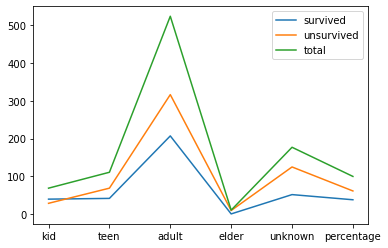

In [15]:
byAge_s={
    'kid': len(s[(s['Age']<13)]),
    'teen': len(s[(s['Age']>12)&(s['Age']<21)]),
'adult':len(s[(s['Age']>=21)&(s['Age']<65)]),
'elder':len(s[s['Age']>=65]),
'unknown': len(s[s['Age'].isna()]),
'percentage': (len(s[(s['Age']>0)&(s['Age']<81)])+len(s[s['Age'].isna()]))/len(titanic)*100
}
byAge_u={
    'kid': len(ts[(ts['Age']<13)]),
    'teen': len(ts[(ts['Age']>12)&(ts['Age']<21)]),
'adult':len(ts[(ts['Age']>=21)&(ts['Age']<65)]),
'elder':len(ts[ts['Age']>=65]),
'unknown': len(ts[ts['Age'].isna()]),
'percentage': (len(ts[(ts['Age']>0)&(ts['Age']<81)])+len(ts[ts['Age'].isna()]))/len(titanic)*100}
byAge_t={
    'kid':byAge_s['kid']+byAge_u['kid'],
    'teen':byAge_s['teen']+byAge_u['teen'],
    'adult':byAge_s['adult']+byAge_u['adult'],
    'elder':byAge_s['elder']+byAge_u['elder'],
    'unknown':byAge_s['unknown']+byAge_u['unknown'],
    'percentage': byAge_s['percentage']+byAge_u['percentage']
}
Byage=pd.DataFrame([byAge_s,byAge_u,byAge_t],index='survived unsurvived total'.split())
Byage.transpose().plot()

## victim that have family

In [13]:
bySibSps = {
    'Sibling & Spouses': len(s[s['SibSp']>0]),
    'Parent & Children': len(s[s['Parch'] >0]),
    'Children with nanny': len(s[(s['Parch']==0)&(s['Age']<13)]),
    'Alone/Jomblo':len(s[(s['Parch']==0)&(s['Age']>12)&(s['SibSp']==0)]),
    'Total': 'wew'
    }
bySibSpt = {
    'Sibling & Spouses': len(ts[(ts['SibSp']>0)]),
    'Parent & Children': len(ts[ts['Parch'] >0]),
    'Children with nanny': len(ts[(ts['Parch']==0)&(ts['Age']<13)]),
    'Alone/Jomblo':len(ts[(ts['Parch']==0)&(ts['Age']>12)&(ts['SibSp']==0)]),
    'Total': len(ts[ts['SibSp']>0]) + len(ts['Parch'])
}
tableSibSp=pd.DataFrame([bySibSps,bySibSpt],index='survived unsurvived'.split())
tableSibSp


,Sibling & Spouses,Parent & Children,Children with nanny,Alone/Jomblo,Total
survived,132,109,2,129,wew
unsurvived,151,104,1,273,700


In [27]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64